In [167]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import ks_2samp

In [142]:
!ls

BPT_diagram.ipynb		SDSS_table_A2065_BTP.csv
data_rbaier.csv			SDSS_table_A2065.csv
data_rbaier.fit			SDSS_table_A2065_filter2.csv
Metodo_Bootstrapping.ipynb	SDSS_table_A2065_filter.csv
SDSS_A2065_BPT_info.csv		SDSS_table_A2065.fits
SDSS_catalogue_for_A2065.ipynb	Stellar_Mass.ipynb


In [357]:
tabla = pd.read_csv('SDSS_catalogue_A2065_final.csv')
tabla.columns

Index(['Unnamed: 0', 'col1', 'ra', 'dec', 'type', 'u', 'g', 'r', 'i', 'z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'specobjid', 'redshift', 'redshiftErr', 'h_alpha_flux',
       'h_beta_flux', 'oiii_5007_flux', 'nii_6584_flux', 'sii_6717_flux',
       'sii_6731_flux', 'oi_6300_flux', 'h_alpha_flux_err', 'h_beta_flux_err',
       'oiii_5007_flux_err', 'nii_6584_flux_err', 'sii_6717_flux_err',
       'sii_6731_flux_err', 'oi_6300_flux_err', 'logMass', 'logMass_err',
       'Log_NII_on_Halpha', 'Log_OIII_on_Hbeta', 'Log_NII_on_Halpha_err',
       'Log_OIII_on_Hbeta_err', 'Category'],
      dtype='object')

In [358]:
Log1_NII_Ha = np.linspace(0.01,2.5,50)
Log1_OIII_Hb = 0.61/(np.log10(Log1_NII_Ha) - 0.47) + 1.19  

Log2_NII_Ha = np.linspace(0.01,1.,50)
Log2_OIII_Hb =  0.61/(np.log10(Log2_NII_Ha) - 0.05) + 1.3

In [359]:
SF = tabla[tabla.Category == 'SF']
C = tabla[tabla.Category == 'Comp.']
S = tabla[tabla.Category == 'Seyfert']
L = tabla[tabla.Category == 'Liner']

In [360]:
SF_x = SF.Log_NII_on_Halpha
SF_y = SF.Log_OIII_on_Hbeta
C_x = C.Log_NII_on_Halpha
C_y = C.Log_OIII_on_Hbeta
S_x = S.Log_NII_on_Halpha
S_y = S.Log_OIII_on_Hbeta
L_x = L.Log_NII_on_Halpha
L_y = L.Log_OIII_on_Hbeta

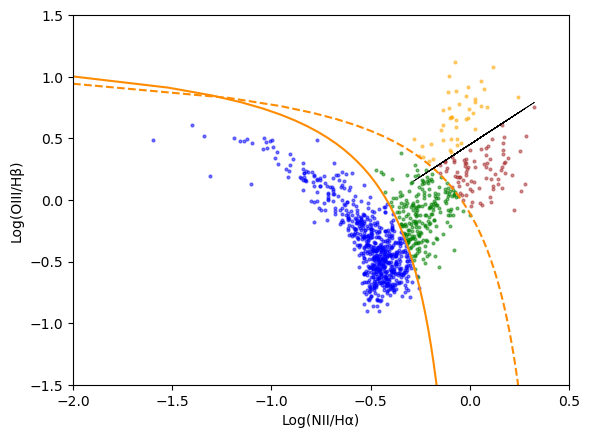

In [361]:
### Separamos las AGNs en Seyfert & Liners
#%matplotlib inline notebook
#log([O III]/Hβ) = 1.05 log([N II]/Hα) + 0.45. 

line =  1.05*(np.array(S_x.to_list()+L_x.to_list())) + 0.45


## SDSS catalogue
plt.plot(SF_x,SF_y,'o',color='blue',markersize=2,alpha=0.5)
plt.plot(C_x,C_y,'o',color='green',markersize=2,alpha=0.5)
plt.plot(S_x,S_y,'o',color='orange',markersize=2,alpha=0.5)
plt.plot(L_x,L_y,'o',color='brown',markersize=2,alpha=0.5)


#Kewley+2011
plt.plot(np.log10(Log1_NII_Ha),Log1_OIII_Hb,color='darkorange',ls='--')
plt.plot(np.log10(Log2_NII_Ha),Log2_OIII_Hb,color='darkorange')
plt.plot((S_x.to_list()+L_x.to_list()),line,color='k',lw=0.5)

plt.xlabel("Log(NII/Hα)")
plt.ylabel("Log(OIII/Hβ)")
plt.xlim(-2.0,0.5)
plt.ylim(-1.5,1.5)
#plt.xlim(-4.5,3.1)
#plt.ylim(-2.5,3.)
#plt.legend(title="Valores de H [Tesla]")
plt.show()

In [362]:
len(S_x)+len(L_x)

125

10.266110417487361 10.872385695268157 10.872605245051485 11.003050869386549


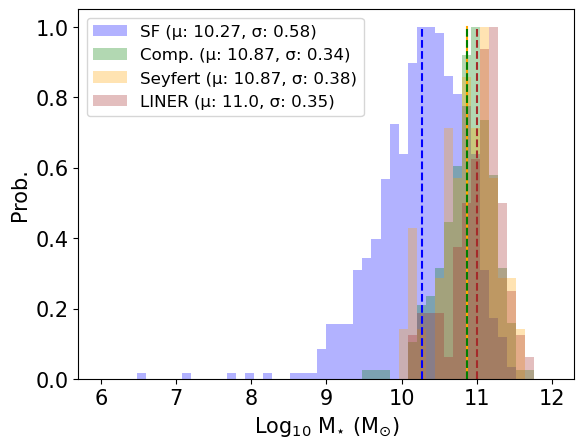

In [364]:
##computing the bin properties (same for both distributions)
num_bin = 50
bin_lims = np.linspace(6,12,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist_sf, _ = np.histogram(np.array(SF_lM.to_list()), bins=bin_lims)
hist_c, _ = np.histogram(np.array(C_lM.to_list()), bins=bin_lims)
hist_s, _ = np.histogram(np.array(S_lM.to_list()), bins=bin_lims)
hist_l, _ = np.histogram(np.array(L_lM.to_list()), bins=bin_lims)
#hist2, _ = np.histogram(dist2, bins=bin_lims)

##normalizing
hist1_sf = hist_sf/np.max(hist_sf)
hist1_c = hist_c/np.max(hist_c)
hist1_s = hist_s/np.max(hist_s)
hist1_l = hist_l/np.max(hist_l)

### Means
sf_mean, sf_std = np.mean(SF_lM), np.std(SF_lM)
c_mean, c_std = np.mean(C_lM), np.std(C_lM)
s_mean, s_std = np.mean(S_lM), np.std(S_lM)
l_mean, l_std = np.mean(L_lM), np.std(L_lM)

plt.bar(bin_centers, hist1_sf, width = bin_widths,color='blue',alpha=0.3,label='SF '+'(μ: '+str(round(sf_mean,2))+', σ: '+str(round(sf_std,2))+')',lw=2, align = 'center')
plt.bar(bin_centers, hist1_c, width = bin_widths,color='green',alpha=0.3,label='Comp. '+'(μ: '+str(round(c_mean,2))+', σ: '+str(round(c_std,2))+')',lw=2, align = 'center')
plt.bar(bin_centers, hist1_s, width = bin_widths,color='orange',alpha=0.3,label='Seyfert '+'(μ: '+str(round(s_mean,2))+', σ: '+str(round(s_std,2))+')',lw=2, align = 'center')
plt.bar(bin_centers, hist1_l, width = bin_widths,color='brown',alpha=0.3,label='LINER '+'(μ: '+str(round(l_mean,2))+', σ: '+str(round(l_std,2))+')',lw=2, align = 'center')
#plt.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.5)

plt.plot(sf_mean+np.zeros(10),np.linspace(0,1,10),'--',color='blue')
plt.plot(s_mean+np.zeros(10),np.linspace(0,1,10),'-',color='orange')
plt.plot(c_mean+np.zeros(10),np.linspace(0,1,10),'--',color='green')
plt.plot(l_mean+np.zeros(10),np.linspace(0,1,10),'--',color='brown')


print(sf_mean,c_mean,s_mean,l_mean)

plt.xlabel("Log$_{10}$ M$_{\star}$ (M$_{\odot}$)",fontsize=15)
plt.ylabel("Prob.",fontsize=15)
plt.legend(fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=15)
plt.show()

In [365]:
## CDF

def cdf(sample):
    cdfs = []
    for i in sample:
        s=0
        for j in sample:
            if j<i:
                s+=1
            else:
                s+=0
        cdfs.append(s/len(sample))
    return np.array(cdfs)     

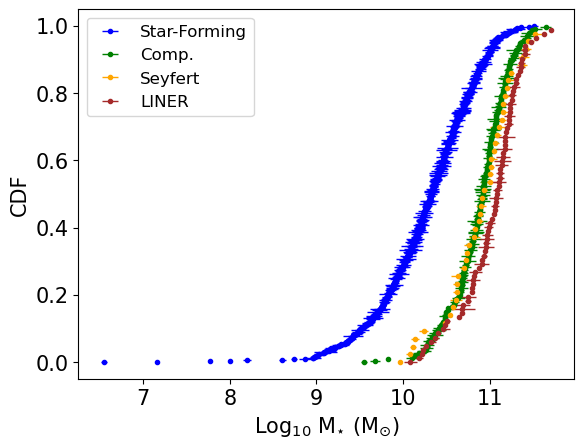

In [366]:

plt.plot(np.sort(SF_lM),cdf(np.sort(SF_lM)),'.',color='blue',markersize=0.1)
plt.errorbar(np.sort(SF_lM),cdf(np.sort(SF_lM)),xerr=SF_lM_err,fmt='.',elinewidth=1,color='blue',label='Star-Forming')

plt.plot(np.sort(C_lM),cdf(np.sort(C_lM)),'.',color='green',markersize=0.1)
plt.errorbar(np.sort(C_lM),cdf(np.sort(C_lM)),xerr=C_lM_err,fmt='.',elinewidth=1,color='green',label='Comp.')

plt.plot(np.sort(S_lM),cdf(np.sort(S_lM)),'.',color='orange',markersize=0.1)
plt.errorbar(np.sort(S_lM),cdf(np.sort(S_lM)),xerr=S_lM_err,fmt='.',elinewidth=1,color='orange',label='Seyfert')

plt.plot(np.sort(L_lM),cdf(np.sort(L_lM)),'.',color='green',markersize=0.1)
plt.errorbar(np.sort(L_lM),cdf(np.sort(L_lM)),xerr=L_lM_err,fmt='.',elinewidth=1,color='brown',label='LINER')



plt.xlabel("Log$_{10}$ M$_{\star}$ (M$_{\odot}$)",fontsize=15)
plt.ylabel("CDF",fontsize=15)
plt.legend(fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=15)

0.5406769720581459 D+


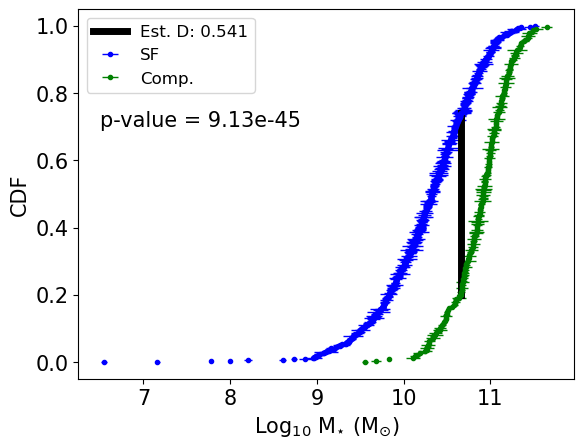

In [367]:
#perform Kolmogorov-Smirnov test entre SF y Composite
ks_SF_C = ks_2samp(np.sort(SF_lM),np.sort(C_lM))

## Estadístico SF_C
D_SF_C = np.sort(C_lM)-ks_SF_C.statistic_location
D_SF_C_filter = D_SF_C == np.min(np.abs(D_SF_C))
D_SF_C_cdf = cdf(np.sort(C_lM))[D_SF_C_filter]

plt.plot(np.sort(SF_lM),cdf(np.sort(SF_lM)),'.',color='blue',markersize=0.1)
plt.errorbar(np.sort(SF_lM),cdf(np.sort(SF_lM)),xerr=SF_lM_err,fmt='.',elinewidth=1,color='blue',label='SF')

plt.plot(np.sort(C_lM),cdf(np.sort(C_lM)),'.',color='green',markersize=0.1)
plt.errorbar(np.sort(C_lM),cdf(np.sort(C_lM)),xerr=C_lM_err,fmt='.',elinewidth=1,color='green',label='Comp.')

diff1 = abs(D_SF_C_cdf - D_SF_C_cdf+ks_SF_C.statistic)[0]
print(diff1,'D+')
plt.plot([ks_SF_C.statistic_location,ks_SF_C.statistic_location],[D_SF_C_cdf,D_SF_C_cdf+ks_SF_C.statistic],'k',lw=5,label="Est. D: "+str(round(diff1,3)))

#p-value
plt.text(6.5,0.7,'p-value = '+str("%.3g" % ks_SF_C.pvalue),fontsize=15)

plt.xlabel("Log$_{10}$ M$_{\star}$ (M$_{\odot}$)",fontsize=15)
plt.ylabel("CDF",fontsize=15)
plt.legend(fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=15)

0.5256027309579688 D+


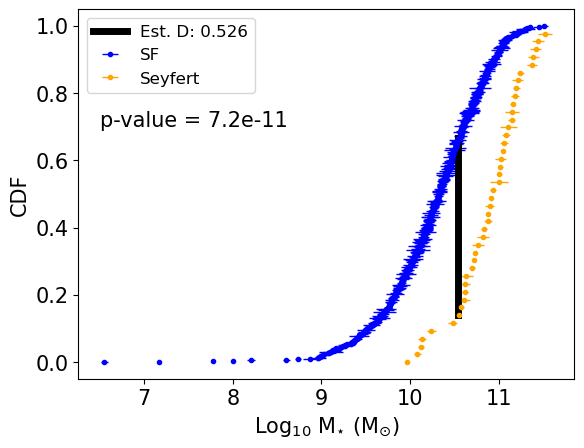

In [368]:
#perform Kolmogorov-Smirnov test entre SF y Seyfert
ks_SF_S = ks_2samp(np.sort(SF_lM),np.sort(S_lM))

## Estadístico SF_S
D_SF_S = np.sort(S_lM)-ks_SF_S.statistic_location
D_SF_S_filter = D_SF_S == np.min(np.abs(D_SF_S))
D_SF_S_cdf = cdf(np.sort(S_lM))[D_SF_S_filter]

plt.plot(np.sort(SF_lM),cdf(np.sort(SF_lM)),'.',color='blue',markersize=0.1)
plt.errorbar(np.sort(SF_lM),cdf(np.sort(SF_lM)),xerr=SF_lM_err,fmt='.',elinewidth=1,color='blue',label='SF')

plt.plot(np.sort(S_lM),cdf(np.sort(S_lM)),'.',color='green',markersize=0.1)
plt.errorbar(np.sort(S_lM),cdf(np.sort(S_lM)),xerr=S_lM_err,fmt='.',elinewidth=1,color='orange',label='Seyfert')

diff2 = abs(D_SF_S_cdf - D_SF_S_cdf+ks_SF_S.statistic)[0]
print(diff2,'D+')
plt.plot([ks_SF_S.statistic_location,ks_SF_S.statistic_location],[D_SF_S_cdf,D_SF_S_cdf+ks_SF_S.statistic],'k',lw=5,label="Est. D: "+str(round(diff2,3)))

#p-value
plt.text(6.5,0.7,'p-value = '+str("%.3g" % ks_SF_S.pvalue),fontsize=15)

plt.xlabel("Log$_{10}$ M$_{\star}$ (M$_{\odot}$)",fontsize=15)
plt.ylabel("CDF",fontsize=15)
plt.legend(fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=15)

0.6091966882971582 D+


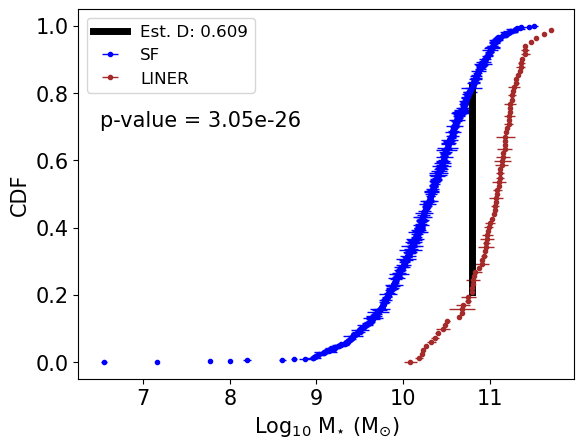

In [369]:
#perform Kolmogorov-Smirnov test entre SF y LINER
ks_SF_L = ks_2samp(np.sort(SF_lM),np.sort(L_lM))

## Estadístico SF_LINER
D_SF_L = np.sort(L_lM)-ks_SF_L.statistic_location
D_SF_L_filter = D_SF_L == np.min(np.abs(D_SF_L))
D_SF_L_cdf = cdf(np.sort(L_lM))[D_SF_L_filter]

plt.plot(np.sort(SF_lM),cdf(np.sort(SF_lM)),'.',color='blue',markersize=0.1)
plt.errorbar(np.sort(SF_lM),cdf(np.sort(SF_lM)),xerr=SF_lM_err,fmt='.',elinewidth=1,color='blue',label='SF')

plt.plot(np.sort(L_lM),cdf(np.sort(L_lM)),'.',color='green',markersize=0.1)
plt.errorbar(np.sort(L_lM),cdf(np.sort(L_lM)),xerr=L_lM_err,fmt='.',elinewidth=1,color='brown',label='LINER')

diff3 = abs(D_SF_L_cdf - D_SF_L_cdf+ks_SF_L.statistic)[0]
print(diff3,'D+')
plt.plot([ks_SF_L.statistic_location,ks_SF_L.statistic_location],[D_SF_L_cdf,D_SF_L_cdf+ks_SF_L.statistic],'k',lw=5,label="Est. D: "+str(round(diff3,3)))

#p-value
plt.text(6.5,0.7,'p-value = '+str("%.3g" % ks_SF_L.pvalue),fontsize=15)

plt.xlabel("Log$_{10}$ M$_{\star}$ (M$_{\odot}$)",fontsize=15)
plt.ylabel("CDF",fontsize=15)
plt.legend(fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=15)

0.0998194754167994 D+


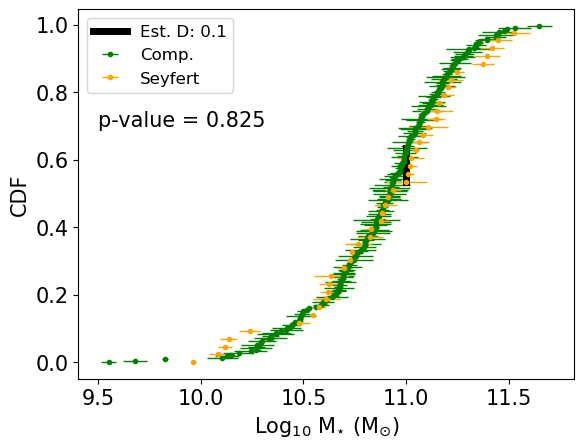

In [370]:

%matplotlib inline
#perform Kolmogorov-Smirnov test entre Comp y Seyfert
ks_C_S = ks_2samp(np.sort(C_lM),np.sort(S_lM))

## Estadístico C_S
D_C_S = np.sort(S_lM)-ks_C_S.statistic_location
D_C_S_filter = D_C_S == np.min(np.abs(D_C_S))
D_C_S_cdf = cdf(np.sort(S_lM))[D_C_S_filter]

plt.plot(np.sort(C_lM),cdf(np.sort(C_lM)),'.',color='blue',markersize=0.1)
plt.errorbar(np.sort(C_lM),cdf(np.sort(C_lM)),xerr=C_lM_err,fmt='.',elinewidth=1,color='green',label='Comp.')

plt.plot(np.sort(S_lM),cdf(np.sort(S_lM)),'.',color='green',markersize=0.1)
plt.errorbar(np.sort(S_lM),cdf(np.sort(S_lM)),xerr=S_lM_err,fmt='.',elinewidth=1,color='orange',label='Seyfert')

diff4 = abs(D_C_S_cdf - D_C_S_cdf+ks_C_S.statistic)[0]
print(diff4,'D+')
plt.plot([ks_C_S.statistic_location,ks_C_S.statistic_location],[D_C_S_cdf,D_C_S_cdf+ks_C_S.statistic],'k',lw=5,label="Est. D: "+str(round(diff4,3)))

#p-value
plt.text(9.5,0.7,'p-value = '+str("%.3g" % ks_C_S.pvalue),fontsize=15)

plt.xlabel("Log$_{10}$ M$_{\star}$ (M$_{\odot}$)",fontsize=15)
plt.ylabel("CDF",fontsize=15)
plt.legend(fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=15)

0.25960574674239895 D+


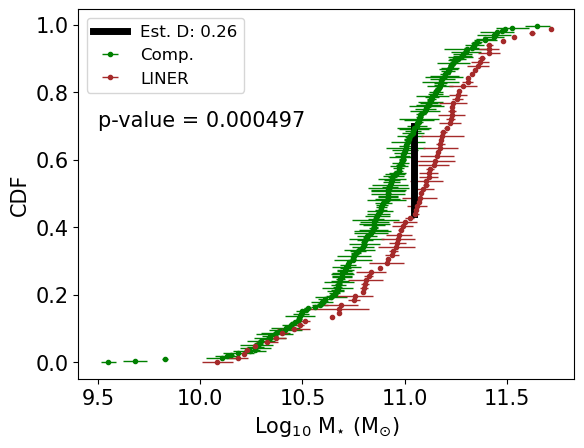

In [371]:
#perform Kolmogorov-Smirnov test entre Comp y LINER
ks_C_L = ks_2samp(np.sort(C_lM),np.sort(L_lM))

## Estadístico SF_L
D_C_L = np.sort(L_lM)-ks_C_L.statistic_location
D_C_L_filter = D_C_L == np.min(np.abs(D_C_L))
D_C_L_cdf = cdf(np.sort(L_lM))[D_C_L_filter]

plt.plot(np.sort(C_lM),cdf(np.sort(C_lM)),'.',color='blue',markersize=0.1)
plt.errorbar(np.sort(C_lM),cdf(np.sort(C_lM)),xerr=C_lM_err,fmt='.',elinewidth=1,color='green',label='Comp.')

plt.plot(np.sort(L_lM),cdf(np.sort(L_lM)),'.',color='green',markersize=0.1)
plt.errorbar(np.sort(L_lM),cdf(np.sort(L_lM)),xerr=L_lM_err,fmt='.',elinewidth=1,color='brown',label='LINER')

diff5 = abs(D_C_L_cdf - D_C_L_cdf+ks_C_L.statistic)[0]
print(diff5,'D+')
plt.plot([ks_C_L.statistic_location,ks_C_L.statistic_location],[D_C_L_cdf,D_C_L_cdf+ks_C_L.statistic],'k',lw=5,label="Est. D: "+str(round(diff5,3)))

#p-value
plt.text(9.5,0.7,'p-value = '+str("%.3g" % ks_C_L.pvalue),fontsize=15)

plt.xlabel("Log$_{10}$ M$_{\star}$ (M$_{\odot}$)",fontsize=15)
plt.ylabel("CDF",fontsize=15)
plt.legend(fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=15)

0.2189449801474759 D+


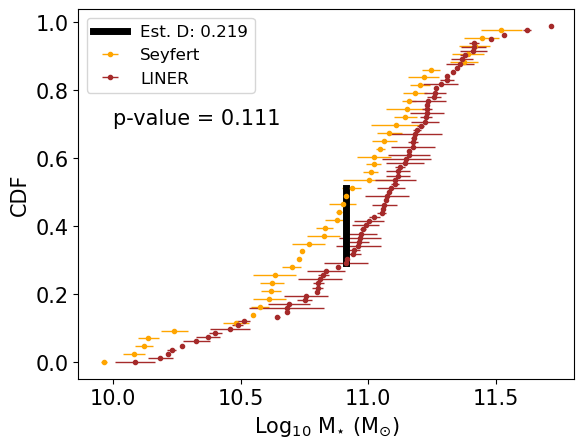

In [372]:
#perform Kolmogorov-Smirnov test entre Seyfert y Liner
ks_S_L = ks_2samp(np.sort(S_lM),np.sort(L_lM))

## Estadístico S_L
D_S_L = np.sort(L_lM)-ks_S_L.statistic_location
D_S_L_filter = D_S_L == np.min(np.abs(D_S_L))
D_S_L_cdf = cdf(np.sort(L_lM))[D_S_L_filter]

plt.plot(np.sort(S_lM),cdf(np.sort(S_lM)),'.',color='blue',markersize=0.1)
plt.errorbar(np.sort(S_lM),cdf(np.sort(S_lM)),xerr=S_lM_err,fmt='.',elinewidth=1,color='orange',label='Seyfert')

plt.plot(np.sort(L_lM),cdf(np.sort(L_lM)),'.',color='green',markersize=0.1)
plt.errorbar(np.sort(L_lM),cdf(np.sort(L_lM)),xerr=L_lM_err,fmt='.',elinewidth=1,color='brown',label='LINER')

diff6 = abs(D_S_L_cdf - D_S_L_cdf+ks_S_L.statistic)[0]
print(diff6,'D+')
plt.plot([ks_S_L.statistic_location,ks_S_L.statistic_location],[D_S_L_cdf,D_S_L_cdf+ks_S_L.statistic],'k',lw=5,label="Est. D: "+str(round(diff6,3)))

#p-value
plt.text(10.,0.7,'p-value = '+str("%.3g" % ks_S_L.pvalue),fontsize=15)

plt.xlabel("Log$_{10}$ M$_{\star}$ (M$_{\odot}$)",fontsize=15)
plt.ylabel("CDF",fontsize=15)
plt.legend(fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=15)

In [373]:
alpha = 0.05
alpha

0.05

In [374]:
# Ho: Las dos distribuciones son iguales
#si p-value > alpha: NO RECHAZAMOS Ho